In [1]:
import os
# change working directory
root_dir = os.path.join(os.getcwd(), '..')
os.chdir(root_dir)

In [2]:
os.getcwd(), os.listdir(os.getcwd())

('/home/renjie/Documents/MTech/AY1819Sem1/KE5208_SenseMakingAndInsightsDiscovery/CA',
 ['paper',
  'notebooks',
  '.vscode',
  '.git',
  'Sample_Code',
  'data',
  'src',
  'LICENSE',
  'README.md',
  '.gitignore',
  'notes.txt',
  'pictures'])

In [3]:
import numpy as np
import glob
import matplotlib.pyplot as plt
import scipy.io as sio
from src.utils import get_dataset

In [4]:
data_path = os.path.join(os.getcwd(),'data')
os.listdir(data_path)

['Depth', 'Inertial', 'Skeleton']

In [5]:
depth_paths, inertial_paths, skeleton_paths = get_dataset(data_path)

In [6]:
num = 450

In [ ]:
depth_name = depth_paths[num]
depth_test = sio.loadmat(depth_name)
depth_test_name = depth_name.split('/')[-1].split('.')[0]

In [ ]:
depth_info = depth_test['d_depth']

In [ ]:
depth_info.shape

In [ ]:
from matplotlib import animation

In [ ]:
%matplotlib notebook
fig, ax = plt.subplots(1, figsize = (6,6))

ax = plt.axes()
ax.set_title(depth_test_name)
ax.set_axis_off()
im = plt.imshow(depth_info[:,:,0])

def init():
    im.set_data(depth_info[:,:,0])
    return [im]

def animate(i):
    im.set_array(depth_info[:,:,i])
    return [im]

ani = animation.FuncAnimation(fig, animate, init_func=init, frames = depth_info.shape[-1],interval = 50, blit = True)
ani.save('animate.gif', writer='imagemagick', fps=20)
plt.show()

# Skeleton
Each skeleton data is a `20 x 3 x num_frame matrix`. <br>
Each row of a skeleton frame corresponds to three spatial coordinates of a joint. <br>
The skeleton joint order in UTD-MAD dataset:
1. head 
2. shoulder_center
3. spine
4. hip_center
5. left_shoulder
6. left_elbow
7. left_wrist
8. left_hand
9. right_shoulder
10. right_elbow
11. right_wrist
12. right_hand
13. left_hip
14. left_knee
15. left_ankle
16. left_foot
17. right_hip
18. right_knee
19. right_ankle
20. right_foot

In [7]:
skeleton_test = sio.loadmat(skeleton_paths[num])
skeleton_info = skeleton_test['d_skel']
skeleton_info.shape

(20, 3, 67)

In [8]:
J = np.array([[1, 2, 3, 2, 5, 6, 7, 2, 9,  10, 11, 4,  13, 14, 15, 4,  17, 18, 19],
     [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]])
J -= 1

<IPython.core.display.Javascript object>


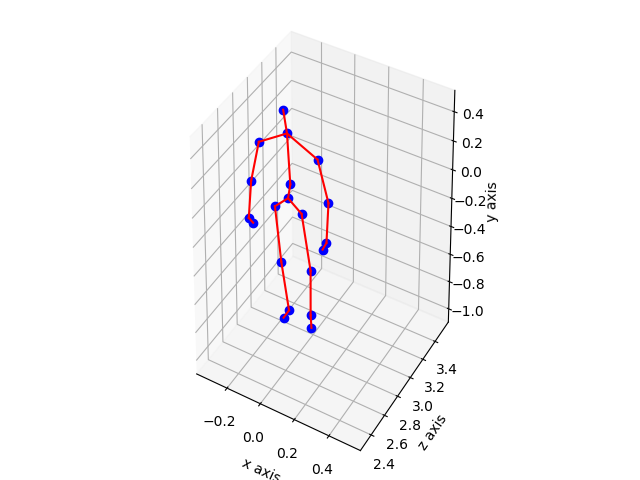

In [9]:
import mpl_toolkits.mplot3d.axes3d as p3
from matplotlib import animation

%matplotlib notebook
fig = plt.figure()
ax = p3.Axes3D(fig)

maxx = skeleton_info[:,0,:].max()
minx = skeleton_info[:,0,:].min()
maxy = skeleton_info[:,1,:].max()
miny = skeleton_info[:,1,:].min()
maxz = skeleton_info[:,2,:].max()
minz = skeleton_info[:,2,:].min()

ax.set_xlabel('x axis')
ax.set_ylabel('z axis')
ax.set_zlabel('y axis')
ax.set_xlim3d(minx, maxx)
ax.set_zlim3d(miny, maxy)
ax.set_ylim3d(minz, maxz)

ax.set_aspect('equal')



joint = skeleton_info[:,:,0]
ln = []
ln.append(ax.plot(joint[:,0], joint[:,2], joint[:,1], 'o', c = 'b'))
for i in range(len(J[0])):
    point1 = joint[J[0,i],:]
    point2 = joint[J[1,i],:]
        
    ln.append(ax.plot(xs = [point1[0], point2[0]], ys = [point1[2], point2[2]], zs = [point1[1], point2[1]], c = 'r'))


def animate(i):
    print("hi")
    print(len(ln))
    joint = skeleton_info[:,:,i]
    for j in range(len(ln)):
        print(j)
        if j == 0:
            ln[j].set_data(joint[:,0],joint[:,2])
            ln[j].set_3d_properties(joint[:,1])
            
        else:
            point1 = joint[J[0,i],:]
            point2 = joint[J[1,i],:]
            ln[j].set_data(xs = [point1[0], point2[0]], ys = [point1[2], point2[2]])
            ln[j].set_3d_properties([point1[1], point2[1]])
    return ln 
ani = animation.FuncAnimation(fig, animate, frames = 67,interval = 10, blit = False)
# ani.save('animate.gif', writer='imagemagick', fps=20)
plt.show()

In [ ]:
test[0]